Steps
- clean up ozone DataFrame
- clean up asthma DataFrame
- merge ozone + asthma
- graph per year (2011-2016)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.stats import linregress

In [113]:
xls = pd.ExcelFile('Resources/CA-daily_O3_ppb_2010-2016_Ruby.xlsx', )
ozone_2010 = pd.read_excel(xls, '2010', encoding='utf8')
ozone_2011 = pd.read_excel(xls, '2011', encoding='utf8')
ozone_2012 = pd.read_excel(xls, '2012', encoding='utf8')
ozone_2013 = pd.read_excel(xls, '2013', encoding='utf8')
ozone_2014 = pd.read_excel(xls, '2014', encoding='utf8')
ozone_2015 = pd.read_excel(xls, '2015', encoding='utf8')
ozone_2016 = pd.read_excel(xls, '2016', encoding='utf8')
ozone_2010.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,15,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
1,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
2,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
3,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,13,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
4,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,8,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
5,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,6,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
6,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,4,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
7,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,2,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
8,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,5,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
9,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,8,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473


In [114]:
ozone_2010.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'O3_ppb', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [115]:
# remove extraneous columns from every df
sheets = [ozone_2010, ozone_2011, ozone_2012, ozone_2013, ozone_2014, ozone_2015, ozone_2016]
for df in sheets:
    df.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'City Name',
       'CBSA Name', 'Date of Last Change'], axis=1, inplace=True)
ozone_2010.head()

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda


In [116]:
for df in sheets:
    df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
    df['Year'] = pd.DatetimeIndex(df['Date Local']).year

In [117]:
ozone_2011.head()

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name,Year
0,2011-01-01,17.292,0.017292,0.028,23,24,Alameda,2011
1,2011-01-02,22.792,0.022792,0.030,0,25,Alameda,2011
2,2011-01-03,9.917,0.009917,0.019,9,16,Alameda,2011
3,2011-01-04,6.750,0.006750,0.019,10,16,Alameda,2011
4,2011-01-05,6.292,0.006292,0.019,11,16,Alameda,2011


In [118]:
all_ozone = pd.concat(sheets, sort=False)
all_ozone

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name,Year
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010
5,2010-01-06,2.167,0.002167,0.007,10,6,Alameda,2010
6,2010-01-07,1.667,0.001667,0.005,8,4,Alameda,2010
7,2010-01-08,1.083,0.001083,0.002,5,2,Alameda,2010
8,2010-01-09,2.292,0.002292,0.006,8,5,Alameda,2010
9,2010-01-10,3.333,0.003333,0.009,10,8,Alameda,2010


In [119]:
#del all_ozone['Unnamed: 16']

In [142]:
all_ozone_conc = all_ozone[['County Name', 'O3_ppb', 'AQI', 'Year']]
all_ozone_conc = all_ozone_conc.rename(columns={'County Name': 'County', 'O3_ppb': 'Ozone (ppb)'})
all_ozone_conc.head()

,County,Ozone (ppb),AQI,Year
0,Alameda,7.632,15,2010
1,Alameda,11.958,17,2010
2,Alameda,14.458,17,2010
3,Alameda,7.958,13,2010
4,Alameda,3.667,8,2010


In [143]:
ozone_group = pd.DataFrame(all_ozone_conc.groupby(['Year', 'County']).mean()).reset_index()
ozone_group
#o3group_2011 = pd.DataFrame(ozone_2011_conc.groupby(['County Name']).mean()).reset_index()
#o3group_2011

,Year,County,Ozone (ppb),AQI
0,2010,Alameda,19.944734,25.596466
1,2010,Amador,25.307209,35.798898
2,2010,Butte,33.102122,37.502740
3,2010,Calaveras,29.328263,39.731507
4,2010,Colusa,25.605285,32.310541
5,2010,Contra Costa,23.958731,29.296025
6,2010,El Dorado,39.921773,44.703401
7,2010,Fresno,30.074166,48.199426
8,2010,Glenn,27.215805,34.192308
9,2010,Humboldt,22.857522,25.192308


In [122]:
asthma_df = pd.read_csv('Resources/asthma-ed-visits.csv')
asthma_df.head()

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"117,854",40.0,7,28


In [123]:
asthma_df['Geography'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Humbolt'], dtype=object)

In [124]:
# remove 'California' so only specific counties remain
asthma_df = asthma_df.loc[asthma_df['Geography'] != 'California', :]

In [125]:
asthma_df['Geography'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Humbolt'], dtype=object)

In [126]:
# check where null values exist
asthma_df.isnull().sum()

LGHC Indicator Name      0
Geography                0
Year                     0
Age Group                0
Strata                   0
Strata Name              0
Numerator              111
Rate                   637
LGHC Indicator ID        0
LGHC Target Rate         0
dtype: int64

In [128]:
asthma_children_df = asthma_df.loc[(asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='Under 18'),:]
asthma_children_df = asthma_children_df.rename(columns={'Geography': 'County'})
asthma_children_df.head()

,LGHC Indicator Name,County,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
796,Asthma ED Visit Rates,Alameda,2015,Under 18,Total Population,Under 18,"3,426",96.7,7,28
797,Asthma ED Visit Rates,Amador,2015,Under 18,Total Population,Under 18,45,85.1,7,28
798,Asthma ED Visit Rates,Butte,2015,Under 18,Total Population,Under 18,308,68.7,7,28
799,Asthma ED Visit Rates,Calaveras,2015,Under 18,Total Population,Under 18,46,63.0,7,28
801,Asthma ED Visit Rates,Colusa,2015,Under 18,Total Population,Under 18,48,77.0,7,28


In [129]:
asthma_children_df = asthma_children_df[['Year', 'County', 'Rate']]
asthma_children_df.head()

,Year,County,Rate
796,2015,Alameda,96.7
797,2015,Amador,85.1
798,2015,Butte,68.7
799,2015,Calaveras,63.0
801,2015,Colusa,77.0


In [130]:
asthma_group = pd.DataFrame(asthma_children_df.groupby(['Year', 'County']).mean()).reset_index()
asthma_group

,Year,County,Rate
0,2011,Alameda,75.9
1,2011,Amador,91.7
2,2011,Butte,63.8
3,2011,Calaveras,84.1
4,2011,Colusa,49.4
5,2011,Contra Costa,93.2
6,2011,Del Norte,90.0
7,2011,El Dorado,40.4
8,2011,Fresno,126.1
9,2011,Glenn,53.1


In [144]:
oa_df = pd.merge(ozone_group, asthma_group, on=['Year','County'])
oa_df

,Year,County,Ozone (ppb),AQI,Rate
0,2011,Alameda,21.322507,26.141045,75.9
1,2011,Amador,25.426951,36.361644,91.7
2,2011,Butte,32.591449,37.293151,63.8
3,2011,Calaveras,29.013634,40.358127,84.1
4,2011,Colusa,25.211324,32.066482,49.4
5,2011,Contra Costa,22.785799,28.416667,93.2
6,2011,El Dorado,39.995495,47.191280,40.4
7,2011,Fresno,31.305375,49.700969,126.1
8,2011,Glenn,27.425226,34.767908,53.1
9,2011,Humboldt,22.321125,24.102996,65.0


In [145]:
oa_df.isnull().sum()

Year           0
County         0
Ozone (ppb)    0
AQI            0
Rate           2
dtype: int64

In [146]:
oa_df = oa_df.dropna()

0.6469570286935081


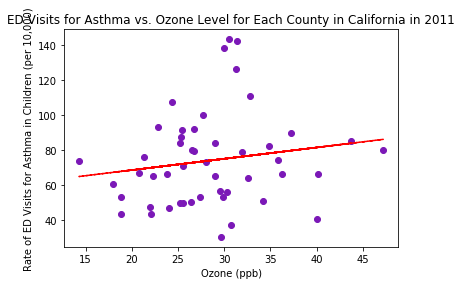

0.6234677004814929


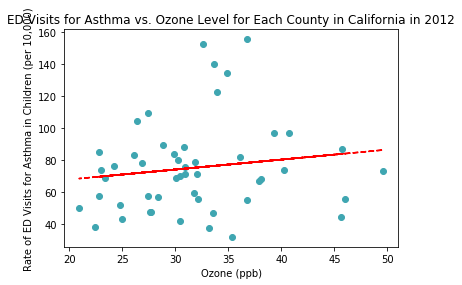

0.48738446401155733


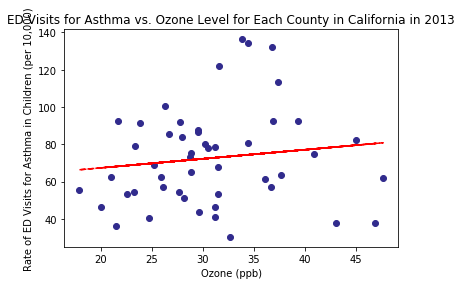

0.7376263615126238


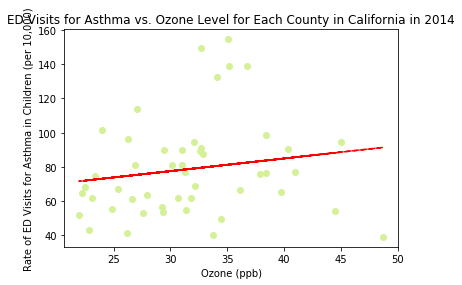

0.6349623985973636


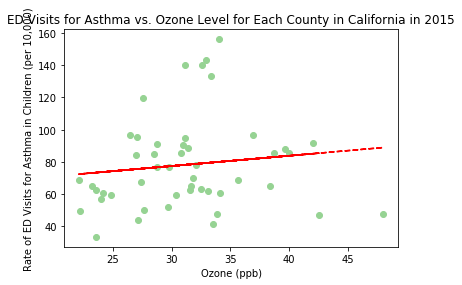

0.3035735935209436


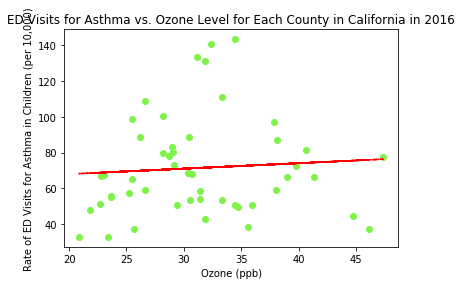

In [147]:
years = ['2011', '2012', '2013', '2014', '2015', '2016']

for year in years:
    df = oa_df.loc[oa_df['Year']==int(year), :]
    
    (slope, intercept, _, _, _) = linregress(df['Ozone (ppb)'],df['Rate'])
    fit = slope * df['Ozone (ppb)'] + intercept
    
    plt.figure()
    plt.scatter(df['Ozone (ppb)'], df['Rate'], c=np.random.rand(3))
    plt.plot(df['Ozone (ppb)'], fit, 'r--')
    
    plt.title(f'ED Visits for Asthma vs. Ozone Level for Each County in California in {year}')
    plt.xlabel("Ozone (ppb)")
    plt.ylabel("Rate of ED Visits for Asthma in Children (per 10,000)")
    print(slope)
    
    plt.show()

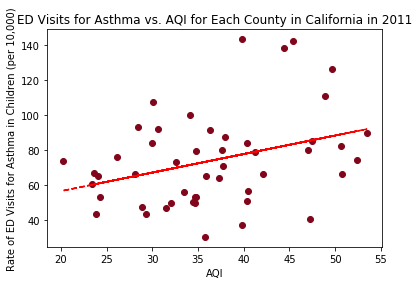

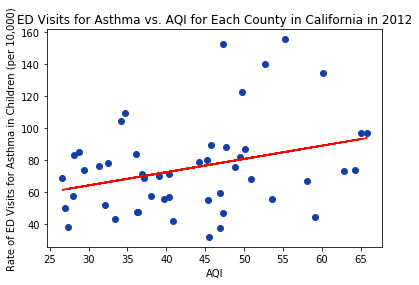

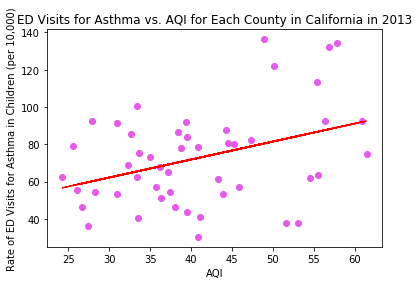

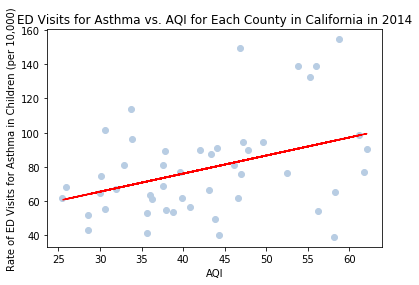

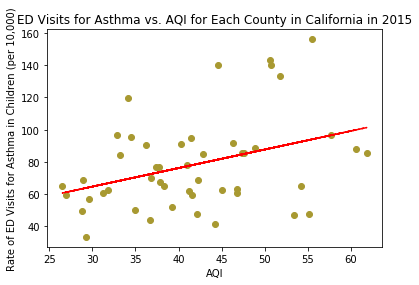

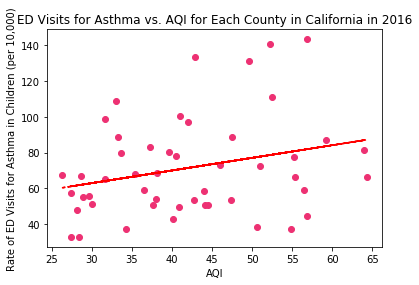

In [148]:
years = ['2011', '2012', '2013', '2014', '2015', '2016']

for year in years:
    df = oa_df.loc[oa_df['Year']==int(year), :]
    
    (slope, intercept, _, _, _) = linregress(df['AQI'],df['Rate'])
    fit = slope * df['AQI'] + intercept
    
    plt.figure()
    plt.scatter(df['AQI'], df['Rate'], c=np.random.rand(3))
    plt.plot(df['AQI'], fit, 'r--')
    
    plt.title(f'ED Visits for Asthma vs. AQI for Each County in California in {year}')
    plt.xlabel("AQI")
    plt.ylabel("Rate of ED Visits for Asthma in Children (per 10,000)")
    
    plt.show()